
![TSC](https://www.sktime.net/en/v0.20.0/_images/tsc.png)



<font size = 8 color=#00FF11> In-Class Assignment (ICA) 1: No Free Lunch! </font>

In this first ICA we will achieve these goals:
1. learn a bit about a particular ML application: time series classification
2. begin to get comfortable with `sklearn`
3. focus on two big-picture ideas from Chapter 1:
    * No Free Lunch Theorem (<font color=#6666FF>NFLT</font>),
    * Unreasonable Effectiveness of Data (<font color=#6666FF>UED</font>).
  
Organization of the ICA:
* work in the group Mahyar assigned you to,
* be sure to use excellent visualization strategies,
* for this ICA only, although your group works closely together, each student turns in a separate notebook to D2L.

Rearrange the room so that you can easily have discssions with your group. 

Our classroom has a lot of white boards - please feel free to use them for discussions with your group.

_____

## <font color=#FFBB11> First Task: NFLT and UED<font>

Discuss the NFLT and UED with your group members. See pages 27 (UED) and 37 (NFLT) in your textbook.

Come to a consensus on how your group understands these ideas. In a markdown cell, summarize both of these concepts in your own words. 



$NFLT$: First need to have some porior knowlegde of the data and list all the model may apply and choose the top 3 or more to test out the preformence and time and select the best one or two maybbe used for your application. 


$UED$: Firstly, 'garbage in garbage' we need to get the good quality data and from the graph we can see that data amount and accuarcy there are some trade off. the more data you have the better accuracy and also need to be ware of the cost of time and money.


_____

## <font color=#FFBB11> Second Task: Time Series Classification <font>

The ML application we will work on today is time series classification. You might know a little about time series analysis (TSA) already, and perhaps you mainly associate it with forecasting: predicting the stock market, the weather and so on. The basic idea of TSA is that we have data that varies with time, such as EEG signals in the brain, weather, and stock prices.

TSA is a giant topic that exploits many parts of machine learning (ML). Today, we will focus on <font color=#6666FF>TS classification</font>. Concretely what this means is that we have a dataset composed of many time series, each individual series labled with a discrete label. We want to train an ML model on this dataset so that we can predict what the label should be in a time series we haven't seen yet. 

Your task is to use the internet to find examples of applications of **time series classification**. Find at least one application for each person in your group. Give a short description of each of these applications in a markdown cell (as an example, for a group with four members, your submission should include four application (one for each member)). 

There is another interesting way to think about this ML problem. We often talk about inputs and outputs, perhaps calling them $X$ (in) and $y$ out. The inputs are usually a set of numbers we call features and the output for classification is a discrete number (binary 0 or 1, or cardinal/ordinal numbers). In the case of time series classifiction we have the interesting case of having a _function_ as the input and a discrete value on the output.  Include this idea in your answer as appropriate. This property of TSA is something we have to learn to manage because functions are technically infinite dimensional.



#### Audio recognition: 
time serise data will be a peceice of voice and classify or predict to some group it belong to (male or female, so on), X is audio data and y will be type of the voice

#### EEG signal: 
input x eeg time serise data and output will be what people actually doing this will be a TSC.

#### Stock Analyst: 

Developing a time series classification model to predict whether to buy, sell, or hold a financial instrument based on historical market data. The input is a function representing the price movements over time, and the output is a discrete trading action.

#### age perdiction: 
input will be time serise of a set of photo for the same person in different age and output will be the age of the person

#### Patient Health State Prediction:

Utilizing time series data from patient vitals (e.g., heart rate, blood pressure) to predict the likelihood of a patient entering a critical health state. The input is a function representing the patient's physiological parameters over time, and the output is a discrete classification of health states.


_____

## <font color=#FFBB11> Third Task: Creating a Dataset and EDA <font>

We could use any of the datasets you might have found in the previous task. But, let's make our own fake data so that we have complete control over it. The dataset we will create is composed of signals that persist or decay; and, they are labeled them as $0$ or $1$. Then, we can see if we can examine previously unseen data and predict whether the signal is decaying or not. How accurate can we be?!

The code is written for you. Look through it so that you can see the sorts of things we will be learning in the coming weeks. Let's start with the libraries. Here, we are using mainly ML libraries from `sklearn`. 

For today, pay most attention to `accuracy_score`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

Next, let's make the fake data. Comment this code in detail and be sure you understand exactly what it does.

Quiz your group members so ensure they also understand it. You will vary all of the options in this code, so be sure you know how to do that.

In [2]:
def generate_data(n_samples=1000, n_points=50, n_cycles = 10, noise_level=0.25, decay_rate=0.05, frequency=1.0):
    """
    Generates a dataset of noisy sinusoids and noisy decaying sinusoids.
    """
    X = np.zeros((n_samples, n_points))
    y = np.zeros(n_samples, dtype=int)

    for i in range(n_samples):
        t = np.linspace(0, n_cycles, n_points)
        noise = np.random.normal(0, noise_level, n_points)

        if np.random.rand() > 0.5:
            X[i, :] = np.sin(2 * np.pi * frequency * t) + noise
            y[i] = 0
        else:
            X[i, :] = np.exp(-decay_rate * t) * np.sin(2 * np.pi * frequency * t) + noise
            y[i] = 1

    return X, y

def plot_data(X, y):
    """
    Plots a selection of time series from each class.
    """
    plt.figure(figsize=(10, 5))

    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.plot(X[y == 0][i], label="Sinusoid")
        plt.legend(fontsize="8")

        plt.subplot(2, 5, i + 6)
        plt.plot(X[y == 1][i], label="Decaying Sinusoid")
        plt.legend(fontsize="8")

    plt.tight_layout()
    plt.show()

What does it [mean in Python](https://www.geeksforgeeks.org/default-arguments-in-python/) when the input to the function has this form:

`n_samples=1000, n_points=50, n_cycles = 1, noise_level=0.25, decay_rate=0.05, frequency=1.0`?

In a markdown cell:
* explain what this Python is doing,
* list what options are available to vary the dataset,
* who would we run these functions?
* what do they return? 

<font color=#FFBB11>

* What does it [mean in Python](https://www.geeksforgeeks.org/default-arguments-in-python/) when the input to the function has this form:

    That is paramenter to adjust output feature of X and y.

*  <font color=#6666FF>generate_data()</font> : is generating some random data it contain two part one is gernate two sets of data one is decaying sinusoid data and Sinusoid data. They are constrain by the if statement and both have 50% chance gernate both of them and the paramenters in the '()' behind the function is give the specific feature or information of the two set of data.

    <font color=#6666FF>plotdata()</font> : is a ploting function (input: X and y) and use the data from the ouput will be 5 of Sinusoid plots and 5 of Decaying Sinusoid plots.

* n_samples, n_points, n_cycles, noise_level, decay_rate, frequency
* first want to get the data and then plot them separetly to see the difference 
* one is two sets of data X and y 
    and one is ploting out them return a figure


How do we run this code, which is just functions?

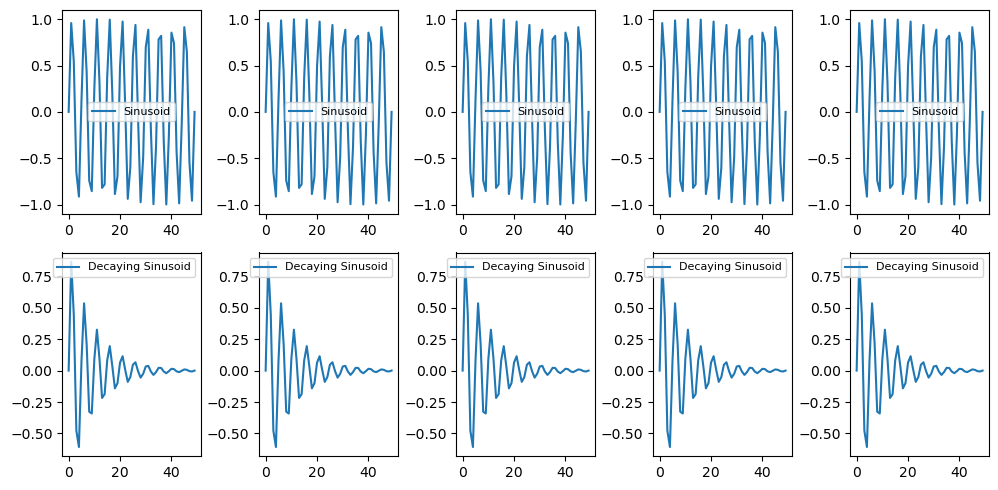

In [3]:
X, y = generate_data(n_samples=1000, n_points=50, n_cycles = 10, noise_level=0, decay_rate=0.5, frequency=1.0) # change this to vary the options
plot_data(X, y)

Now that you can see the data, discuss with your group the idea of "data quality". That is, 
* how does the data look? do you think you can classifiy this data think about it this way: _can you tell the signals apart?!_
* how would you improve the data quality? which of the parameters would you change and how?
* play with the parameters and explore data quality issues.

As usual, describe what you concluded from your explorations in a markdown cell. 

<font color=#FFBB11>

* with the default is noise and can't see any trends 
* but after adjust the noise_levels down and decay_rate up and after you increase the n_cycles will can distinguish it by human eye which is decaying and which is not 
* see code below

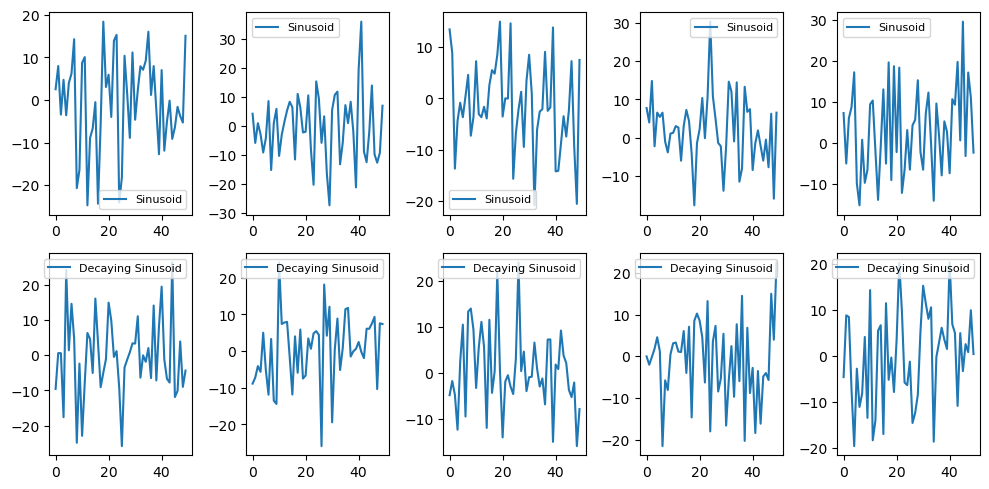

In [4]:
X, y = generate_data(n_samples=1000, n_points=50, n_cycles = 10, noise_level=10, decay_rate=0.5, frequency=1.0) # change this to vary the options
plot_data(X, y)

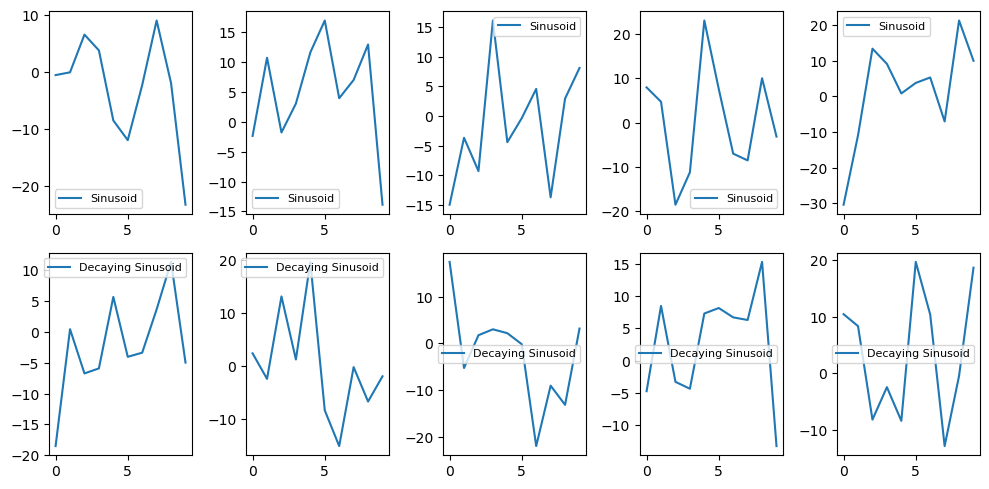

In [5]:
X, y = generate_data(n_samples=1000, n_points=10, n_cycles = 5, noise_level=10, decay_rate=0.5, frequency=3.0) # change this to vary the options
plot_data(X, y)

In [6]:
# Examine the variables that hold the data so that you see what is in them.

y


array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [7]:
X.shape


(1000, 10)

_____

## <font color=#FFBB11> Fourth Task: Machine Learning <font>


Next, here is some code that does the ML. Discuss the code with your group and comment it together. 

Have your group learn how to time code - [look here](https://realpython.com/python-timer/). It will be interesting (and useful!) to time the three different estimators. One of them is quite expensive: you might want to comment it out for some of your studies and/or choose the size of your data set appriately. 

In [10]:

def train_classifiers(X_train, y_train, X_test, y_test):
    """
    Trains three classifiers (MLP, SVC, Logistic Regression) and evaluates their performance.
    """
    mlp = MLPClassifier(max_iter=1000) #Multi-layer Perceptron classifier(Maximum number of iterations is 1000).
    svc = SVC() # C-Support Vector Classification in sklearn with default 
    log_reg = LogisticRegression() #Logistic Regression (aka logit, MaxEnt) classifier with default

    # you can add more estimators here:
    classifiers = {'MLP': mlp, 'SVC': svc, 'Logistic Regression': log_reg}
    #classifiers = {'MLP': mlp}
    scores = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores[name] = accuracy_score(y_test, y_pred)

    return pd.DataFrame(scores, index=['Accuracy'])

def plot_score_vs_datasize(n_samples_list,noise_level = 0.8,n_cycles = 10):
    """
    Plots classifier accuracy as a function of dataset size.
    """
    scores = []

    for n_samples in n_samples_list:
        X, y = generate_data(n_samples=n_samples,noise_level= noise_level, n_cycles = n_cycles)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scores.append(train_classifiers(X_train, y_train, X_test, y_test))

    scores_df = pd.concat(scores, keys=n_samples_list, names=['Data Size'])
    scores_df.reset_index(level=0, inplace=True)

    plt.figure(figsize=(10, 6))
    for classifier in scores_df.columns[1:]:
        plt.plot(scores_df['Data Size'], scores_df[classifier], label=classifier)
    
    plt.xscale('log')  # Set x-axis to log scale
    plt.xlabel('Data Size')
    plt.ylabel('Accuracy')
    plt.title('Classifier Accuracy vs Data Size')
    plt.ylim(0.0,1.1) # change this as needed
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

# you can change the size of the dataset, but be careful to not make it too big
plot_score_vs_datasize([100, 500, 1000, 5000, 10000])
#plot_score_vs_datasize([100, 150, 200, 250, 300, 350, 400, 500, 600, 650, 700, 800, 900, 1000])


: 

# plot time versus data size

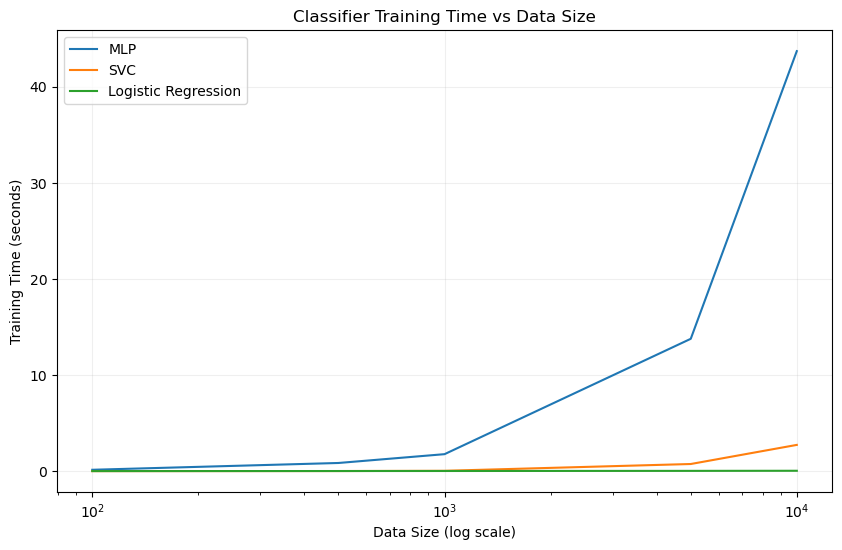

In [9]:
import time

def train_classifiers(X_train, y_train, X_test, y_test):
    """
    Trains three classifiers (MLP, SVC, Logistic Regression) and evaluates their performance.
    """
    mlp = MLPClassifier(max_iter=1000)
    svc = SVC()
    log_reg = LogisticRegression()

    classifiers = {'MLP': mlp, 'SVC': svc, 'Logistic Regression': log_reg}
    training_times = {}

    for name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        training_times[name] = training_time

    return pd.DataFrame(training_times, index=['Training Time'])

def plot_training_time_vs_datasize(n_samples_list,noise_level=0.8):
    """
    Plots classifier training time as a function of dataset size.
    """
    training_times = []

    for n_samples in n_samples_list:
        X, y = generate_data(n_samples=n_samples,noise_level= noise_level)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        training_times.append(train_classifiers(X_train, y_train, X_test, y_test))

    times_df = pd.concat(training_times, keys=n_samples_list, names=['Data Size'])
    times_df.reset_index(level=0, inplace=True)

    plt.figure(figsize=(10, 6))
    for classifier in times_df.columns[1:]:
        plt.plot(times_df['Data Size'], times_df[classifier], label=classifier)
    
    plt.xscale('log')  # Set x-axis to log scale
    plt.xlabel('Data Size (log scale)')
    plt.ylabel('Training Time (seconds)')
    plt.title('Classifier Training Time vs Data Size')
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()

# you can change the size of the dataset, but be careful to not make it too big
plot_training_time_vs_datasize([100, 500, 1000, 5000, 10000])



Discuss with your group how you would visualize everything you learned. 

For example: 
* you might plot accuracy versus data size for all three ML estimators
* you might plot training time versus data size
* other, even more creative, ideas your group comes up with.

<font color=#FFBB11> 

* see the code above the ploting of training time and data size we see MLP with data size increse the training time goes up as well but the other two remain the same. which is SVC and regression classication method maybe more applied to thi type of data.
* So we can change the paramenters and plot out the for all three classication method<font >

____
Please help us re-organize the room for the next class.
____
